In [11]:
import pandas as pd
import numpy as np
import openpyxl

# Load the Excel files
file_path_2024_2025 = 'all-euro-data-2024-2025.xlsx'
file_path_2023_2024 = 'all-euro-data-2023-2024.xlsx'

# Load the Excel files into pandas DataFrames
data_2024_2025 = pd.read_excel(file_path_2024_2025, sheet_name=None)
data_2023_2024 = pd.read_excel(file_path_2023_2024, sheet_name=None)

# Display the sheet names in each file to understand the structure
sheets_2024_2025 = list(data_2024_2025.keys())
sheets_2023_2024 = list(data_2023_2024.keys())

sheets_2024_2025, sheets_2023_2024




(['E0',
  'E1',
  'E2',
  'E3',
  'EC',
  'SC0',
  'SC1',
  'SC2',
  'SC3',
  'D1',
  'D2',
  'SP1',
  'SP2',
  'I1',
  'I2',
  'F1',
  'F2',
  'B1',
  'N1',
  'P1',
  'T1',
  'G1'],
 ['E0',
  'E1',
  'E2',
  'E3',
  'EC',
  'SC0',
  'SC1',
  'SC2',
  'SC3',
  'D1',
  'D2',
  'SP1',
  'SP2',
  'I1',
  'I2',
  'F1',
  'F2',
  'B1',
  'N1',
  'P1',
  'T1',
  'G1'])

In [12]:
# Define a function to merge all sheets from both seasons
def load_and_merge_seasons(data_2024_2025, data_2023_2024):
    merged_data = []

    for sheet_name in sheets_2024_2025:
        # Load data for 2024-2025 and add season and league columns
        df_2024_2025 = data_2024_2025[sheet_name].copy()
        df_2024_2025['Season'] = '2024-2025'
        df_2024_2025['League'] = sheet_name

        # Load data for 2023-2024 and add season and league columns
        df_2023_2024 = data_2023_2024[sheet_name].copy()
        df_2023_2024['Season'] = '2023-2024'
        df_2023_2024['League'] = sheet_name

        # Append both dataframes to the list
        merged_data.append(pd.concat([df_2024_2025, df_2023_2024], ignore_index=True))

    # Combine all sheets into one DataFrame
    combined_df = pd.concat(merged_data, ignore_index=True)
    return combined_df


# Combine both seasons
merged_df = load_and_merge_seasons(data_2024_2025, data_2023_2024)

# Display basic info and first few rows of the merged dataframe
merged_df_info = merged_df.info()
merged_df_sample = merged_df.head()

merged_df_info, merged_df_sample



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Columns: 134 entries, Div to VCCA
dtypes: datetime64[ns](1), float64(119), int64(2), object(12)
memory usage: 9.2+ MB


(None,
   Div       Date      Time    HomeTeam     AwayTeam  FTHG  FTAG FTR     HTHG  \
 0  E0 2024-08-16  20:00:00  Man United       Fulham     1     0   H 0.000000   
 1  E0 2024-08-17  12:30:00     Ipswich    Liverpool     0     2   A 0.000000   
 2  E0 2024-08-17  15:00:00     Arsenal       Wolves     2     0   H 1.000000   
 3  E0 2024-08-17  15:00:00     Everton     Brighton     0     3   A 0.000000   
 4  E0 2024-08-17  15:00:00   Newcastle  Southampton     1     0   H 1.000000   
 
       HTAG  ... IWA VCH  VCD  VCA  IWCH  IWCD  IWCA  VCCH  VCCD  VCCA  
 0 0.000000  ... NaN NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 1 0.000000  ... NaN NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 2 0.000000  ... NaN NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 3 1.000000  ... NaN NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 4 0.000000  ... NaN NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 
 [5 rows x 134 columns])

In [13]:
# Quick exploration of the dataset by checking for missing values and basic statistics
missing_values = merged_df.isnull().sum()
basic_stats = merged_df.describe()

# Check unique values in relevant categorical columns like 'HomeTeam', 'AwayTeam', 'League', and 'Season'
unique_leagues = merged_df['League'].unique()
unique_seasons = merged_df['Season'].unique()
unique_home_teams = merged_df['HomeTeam'].unique()
unique_away_teams = merged_df['AwayTeam'].unique()

# Display results
missing_values, basic_stats, unique_leagues, unique_seasons, len(unique_home_teams), len(unique_away_teams)

# Dropping all betting-related columns
betting_columns = [col for col in merged_df.columns if 'VC' in col or 'VCH' in col or 'IW' in col or 'B365' in col]
merged_df_cleaned = merged_df.drop(columns=betting_columns)

# Checking the columns that remain after removing the betting columns
remaining_columns = merged_df_cleaned.columns

# Displaying the first few rows of the cleaned data
merged_df_cleaned_sample = merged_df_cleaned.head()

remaining_columns, merged_df_cleaned_sample


(Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
        'HTHG', 'HTAG',
        ...
        'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA', 'BFECAHH',
        'BFECAHA', 'Season', 'League'],
       dtype='object', length=108),
   Div       Date      Time    HomeTeam     AwayTeam  FTHG  FTAG FTR     HTHG  \
 0  E0 2024-08-16  20:00:00  Man United       Fulham     1     0   H 0.000000   
 1  E0 2024-08-17  12:30:00     Ipswich    Liverpool     0     2   A 0.000000   
 2  E0 2024-08-17  15:00:00     Arsenal       Wolves     2     0   H 1.000000   
 3  E0 2024-08-17  15:00:00     Everton     Brighton     0     3   A 0.000000   
 4  E0 2024-08-17  15:00:00   Newcastle  Southampton     1     0   H 1.000000   
 
       HTAG  ...    PCAHH    PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  AvgCAHA  \
 0 0.000000  ... 1.830000 2.110000 1.880000 2.110000 1.820000 2.050000   
 1 0.000000  ... 2.040000 1.900000 2.200000 2.000000 1.990000 1.880000   
 2 0.000000  ... 2.

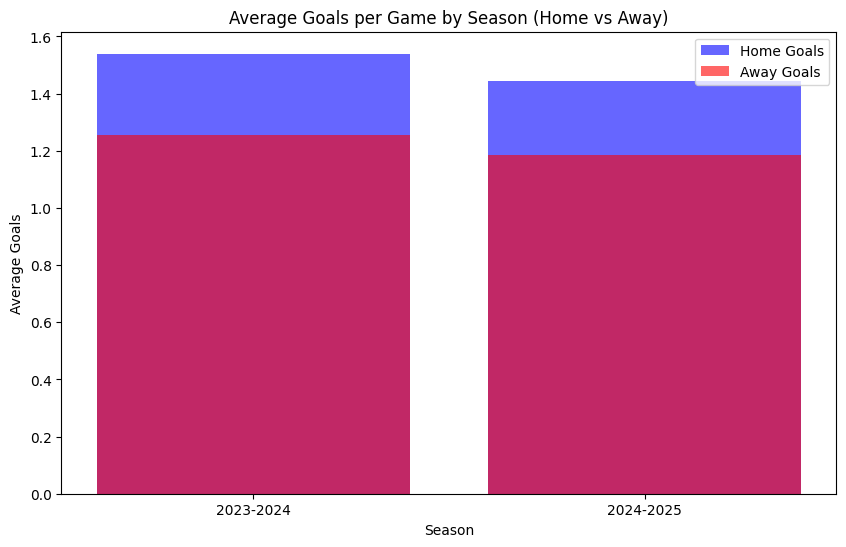

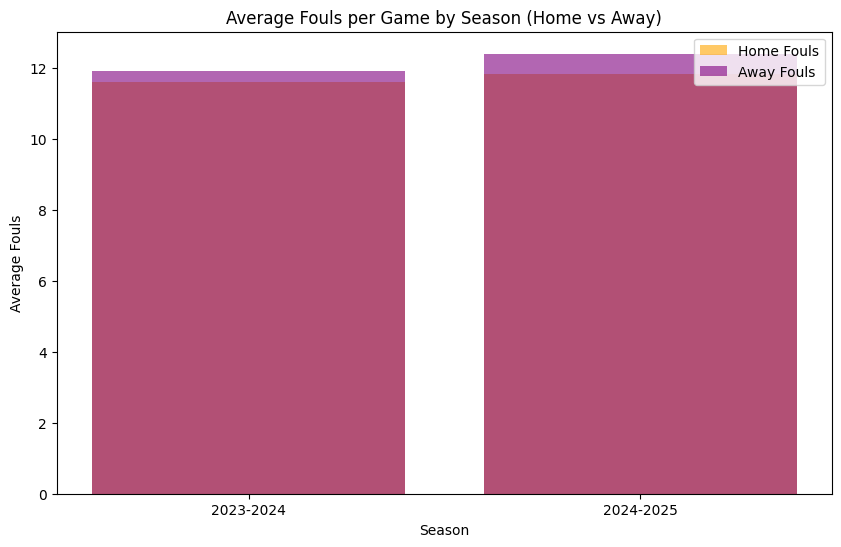

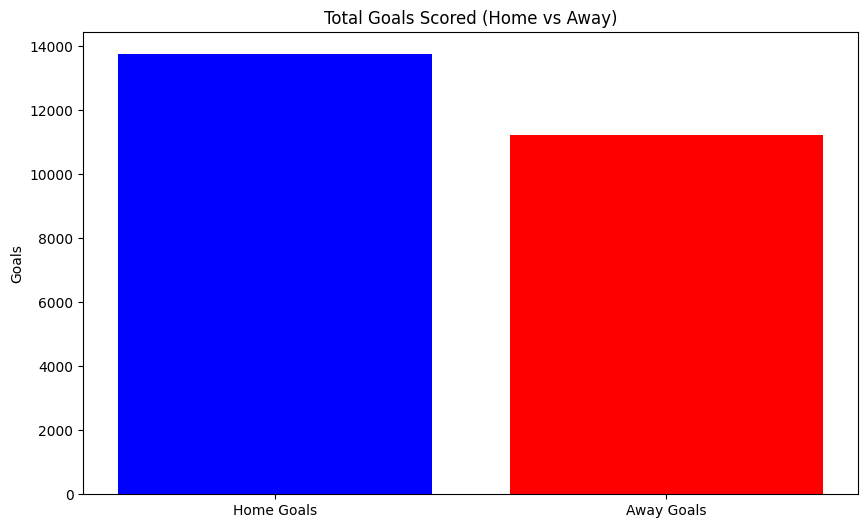

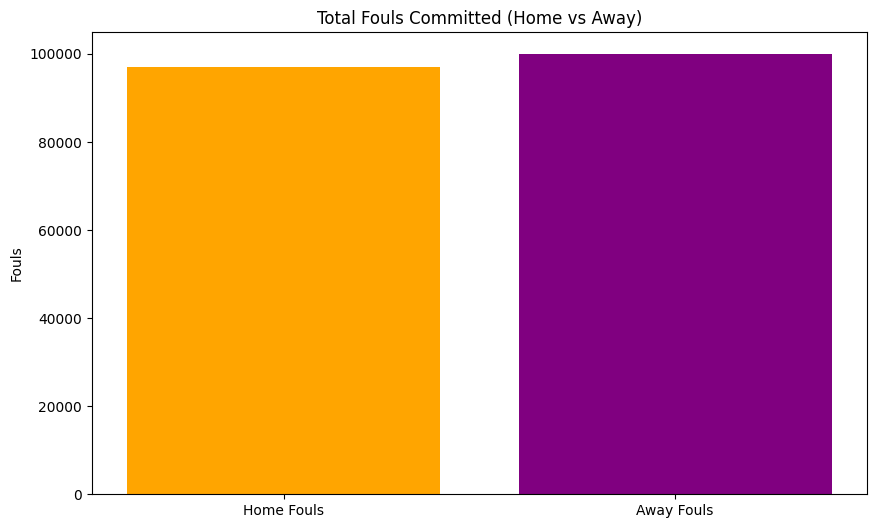

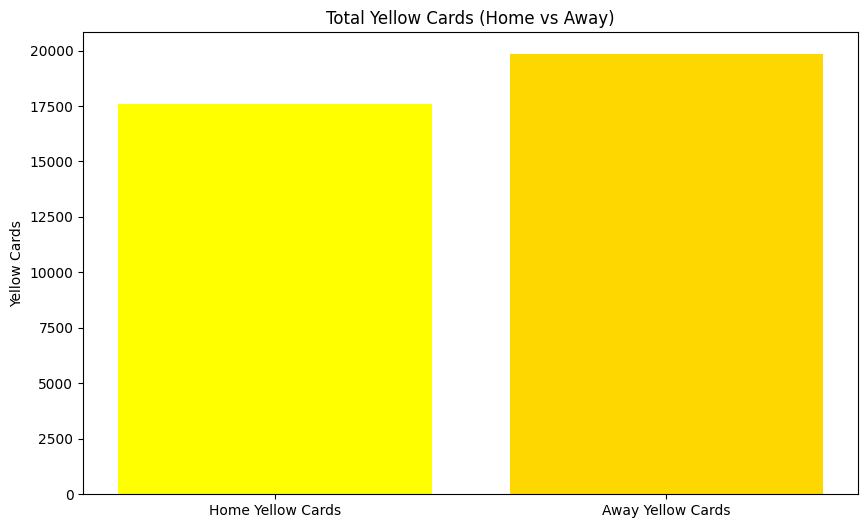

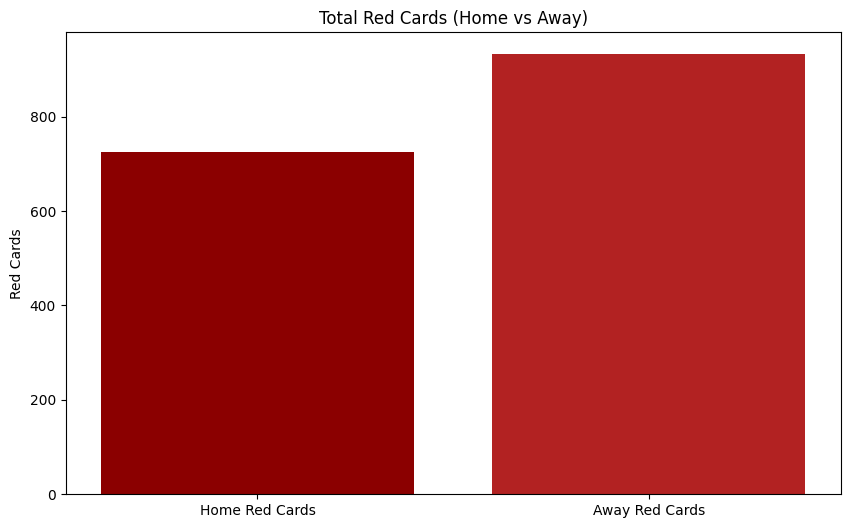

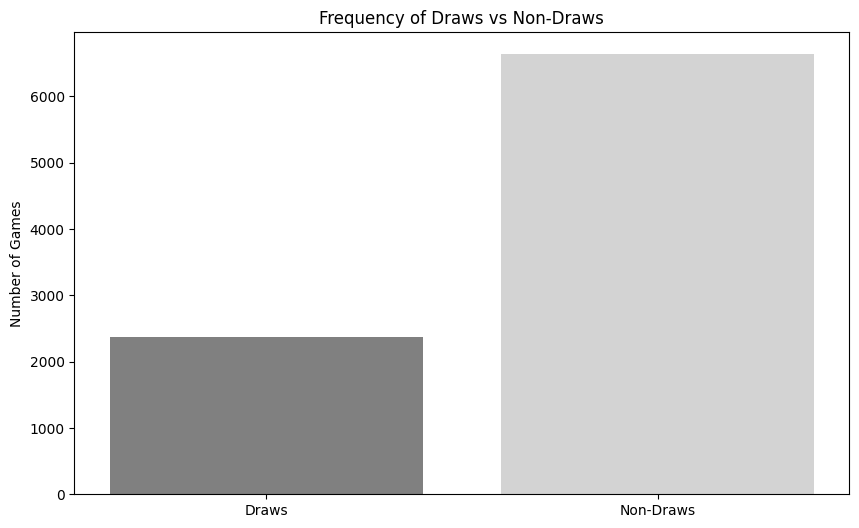

C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_22412\3086174107.py:172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_22412\3086174107.py:172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_22412\3086174107.py:172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_22412\3086174107.py:172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_22412\3086174107.py:172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'Season', 'League', 'TotalGoals', 'TotalFouls'],
      dtype='object')

In [14]:

# visualisations
import matplotlib.pyplot as plt


def visualize_match_statistics(df):
    plt.figure(figsize=(10, 6))
    home_goals_avg = df.groupby('Season')['FTHG'].mean()
    away_goals_avg = df.groupby('Season')['FTAG'].mean()

    # Bar chart for average home and away goals
    plt.bar(home_goals_avg.index, home_goals_avg, label='Home Goals', color='blue', alpha=0.6)
    plt.bar(away_goals_avg.index, away_goals_avg, label='Away Goals', color='red', alpha=0.6)
    plt.title('Average Goals per Game by Season (Home vs Away)')
    plt.ylabel('Average Goals')
    plt.xlabel('Season')
    plt.legend()
    plt.show()

    # Bar chart for fouls comparison between home and away teams
    plt.figure(figsize=(10, 6))
    home_fouls_avg = df.groupby('Season')['HF'].mean()
    away_fouls_avg = df.groupby('Season')['AF'].mean()

    plt.bar(home_fouls_avg.index, home_fouls_avg, label='Home Fouls', color='orange', alpha=0.6)
    plt.bar(away_fouls_avg.index, away_fouls_avg, label='Away Fouls', color='purple', alpha=0.6)
    plt.title('Average Fouls per Game by Season (Home vs Away)')
    plt.ylabel('Average Fouls')
    plt.xlabel('Season')
    plt.legend()
    plt.show()


# Call the function with the cleaned dataframe
visualize_match_statistics(merged_df_cleaned)


# Define a function to visualize key match statistics like goals, fouls, cards, and draws

def visualize_match_stats(df):
    # 1. Goals Scored in a Game (Home and Away)
    plt.figure(figsize=(10, 6))
    home_goals_total = df['FTHG'].sum()
    away_goals_total = df['FTAG'].sum()

    plt.bar(['Home Goals', 'Away Goals'], [home_goals_total, away_goals_total], color=['blue', 'red'])
    plt.title('Total Goals Scored (Home vs Away)')
    plt.ylabel('Goals')
    plt.show()

    # 2. Total Fouls Comparison (Home vs Away)
    plt.figure(figsize=(10, 6))
    home_fouls_total = df['HF'].sum()
    away_fouls_total = df['AF'].sum()

    plt.bar(['Home Fouls', 'Away Fouls'], [home_fouls_total, away_fouls_total], color=['orange', 'purple'])
    plt.title('Total Fouls Committed (Home vs Away)')
    plt.ylabel('Fouls')
    plt.show()

    # 3. Yellow Cards (Home vs Away)
    plt.figure(figsize=(10, 6))
    home_yellow_cards_total = df['HY'].sum()
    away_yellow_cards_total = df['AY'].sum()

    plt.bar(['Home Yellow Cards', 'Away Yellow Cards'], [home_yellow_cards_total, away_yellow_cards_total],
            color=['yellow', 'gold'])
    plt.title('Total Yellow Cards (Home vs Away)')
    plt.ylabel('Yellow Cards')
    plt.show()

    # 4. Red Cards (Home vs Away)
    plt.figure(figsize=(10, 6))
    home_red_cards_total = df['HR'].sum()
    away_red_cards_total = df['AR'].sum()

    plt.bar(['Home Red Cards', 'Away Red Cards'], [home_red_cards_total, away_red_cards_total],
            color=['darkred', 'firebrick'])
    plt.title('Total Red Cards (Home vs Away)')
    plt.ylabel('Red Cards')
    plt.show()

    # 5. Frequency of Draws
    plt.figure(figsize=(10, 6))
    draw_count = df[df['FTR'] == 'D'].shape[0]
    non_draw_count = df.shape[0] - draw_count

    plt.bar(['Draws', 'Non-Draws'], [draw_count, non_draw_count], color=['gray', 'lightgray'])
    plt.title('Frequency of Draws vs Non-Draws')
    plt.ylabel('Number of Games')
    plt.show()


# Call the function to generate the visualizations
visualize_match_stats(merged_df_cleaned)

import plotly.express as px


def interactive_visualizations_with_fouls(df):
    # Frequency of Draws in Each League per Season
    draw_counts = df[df['FTR'] == 'D'].groupby(['League', 'Season']).size().reset_index(name='Draws')

    fig1 = px.bar(draw_counts, x='League', y='Draws', color='Season', barmode='group',
                  title='Frequency of Draws in Each League per Season')
    fig1.update_layout(xaxis_title='League', yaxis_title='Number of Draws')
    fig1.show()

    # Frequency of Over 1.5 Goals in Each League per Season
    df['TotalGoals'] = df['FTHG'] + df['FTAG']
    over_1_5_count = df[df['TotalGoals'] > 1.5].groupby(['League', 'Season']).size().reset_index(name='Over_1.5_Games')

    fig2 = px.bar(over_1_5_count, x='League', y='Over_1.5_Games', color='Season', barmode='group',
                  title='Frequency of Games with Over 1.5 Goals per League and Season')
    fig2.update_layout(xaxis_title='League', yaxis_title='Number of Games (Over 1.5 Goals)')
    fig2.show()

    # Frequency of Over 2.5 Goals in Each League per Season
    over_2_5_count = df[df['TotalGoals'] > 2.5].groupby(['League', 'Season']).size().reset_index(name='Over_2.5_Games')

    fig3 = px.bar(over_2_5_count, x='League', y='Over_2.5_Games', color='Season', barmode='group',
                  title='Frequency of Games with Over 2.5 Goals per League and Season')
    fig3.update_layout(xaxis_title='League', yaxis_title='Number of Games (Over 2.5 Goals)')
    fig3.show()

    # Frequency of Fouls in Each League per Season
    df['TotalFouls'] = df['HF'] + df['AF']
    fouls_count = df.groupby(['League', 'Season'])['TotalFouls'].sum().reset_index()

    fig4 = px.bar(fouls_count, x='League', y='TotalFouls', color='Season', barmode='group',
                  title='Total Fouls in Each League per Season')
    fig4.update_layout(xaxis_title='League', yaxis_title='Total Fouls')
    fig4.show()


# Call the function to generate the visualizations
interactive_visualizations_with_fouls(merged_df_cleaned)

import plotly.express as px

# Filter the data for the top 5 leagues
top_5_leagues = ['E0', 'SP1', 'I1', 'D1', 'F2']  # Premier League, La Liga, Serie A, Bundesliga, Ligue 1
top_5_df = merged_df_cleaned[merged_df_cleaned['League'].isin(top_5_leagues)]


# Define a function to create separate charts for each league
def separate_league_visualizations(df):
    leagues = df['League'].unique()
    for league in leagues:
        league_df = df[df['League'] == league]

        # Over 1.5 goals for the league
        over_1_5_teams = league_df[league_df['TotalGoals'] > 1.5].groupby('HomeTeam').size().reset_index(
            name='Over_1.5_Games')
        fig1 = px.bar(over_1_5_teams, x='HomeTeam', y='Over_1.5_Games', title=f'Over 1.5 Goals by Team in {league}')
        fig1.update_layout(xaxis_title='Team', yaxis_title='Games Over 1.5 Goals', xaxis_tickangle=-45)
        fig1.show()

        # Over 2.5 goals for the league
        over_2_5_teams = league_df[league_df['TotalGoals'] > 2.5].groupby('HomeTeam').size().reset_index(
            name='Over_2.5_Games')
        fig2 = px.bar(over_2_5_teams, x='HomeTeam', y='Over_2.5_Games', title=f'Over 2.5 Goals by Team in {league}')
        fig2.update_layout(xaxis_title='Team', yaxis_title='Games Over 2.5 Goals', xaxis_tickangle=-45)
        fig2.show()

        # Draws by team in the league
        draws_teams = league_df[league_df['FTR'] == 'D'].groupby('HomeTeam').size().reset_index(name='Draws')
        fig3 = px.bar(draws_teams, x='HomeTeam', y='Draws', title=f'Draws by Team in {league}')
        fig3.update_layout(xaxis_title='Team', yaxis_title='Number of Draws', xaxis_tickangle=-45)
        fig3.show()

        # Fouls committed by team in the league
        league_df['TotalFouls'] = league_df['HF'] + league_df['AF']
        fouls_teams = league_df.groupby('HomeTeam')['TotalFouls'].sum().reset_index()
        fig4 = px.bar(fouls_teams, x='HomeTeam', y='TotalFouls', title=f'Total Fouls by Team in {league}')
        fig4.update_layout(xaxis_title='Team', yaxis_title='Total Fouls', xaxis_tickangle=-45)
        fig4.show()


# Call the function for the separated visualizations
separate_league_visualizations(top_5_df)


def clean_data_fixed(df):
    # Dropping unnecessary columns
    columns_to_drop = ['Div', 'Time', 'Referee']
    df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

    # Fill missing values only for numeric columns
    numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
    df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

    return df_cleaned


# Reapply the clean_data_fixed function
merged_df_cleaned = clean_data_fixed(merged_df_cleaned)

# Display the first few rows to confirm missing values have been handled
merged_df_cleaned.head()

# Dropping all betting-related columns based on the provided list

betting_columns = [
    'BFH', 'BFD', 'BFA', 'BSH', 'BSD', 'BSA', 'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA',
    'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PH', 'PSD', 'PD', 'PSA', 'PA',
    'SOH', 'SOD', 'SOA', 'SBH', 'SBD', 'SBA', 'SJH', 'SJD', 'SJA', 'SYH', 'SYD', 'SYA',
    'VCH', 'VCD', 'VCA', 'WHH', 'WHD', 'WHA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
    'BbMxA', 'BbAvA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'BFEH', 'BFED', 'BFEA',
    'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'GB>2.5', 'GB<2.5', 'B365>2.5',
    'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'BbAH', 'BbAHh',
    'AHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'GBAHH', 'GBAHA', 'GBAH', 'LBAHH',
    'LBAHA', 'LBAH', 'B365AHH', 'B365AHA', 'B365AH', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA',
    'AvgAHH', 'AvgAHA', '1XBH', '1XBD', '1XBA', 'BFE>2.5', 'BFE<2.5', 'BFEAHH', 'BFEAHA',
    'BWCH', 'BWCD', 'BWCA', 'BFCH', 'BFCD', 'BFCA', 'PSCH', 'PSCD', 'PSCA',
    'WHCH', 'WHCD', 'WHCA', '1XBCH', '1XBCD', '1XBCA', 'MaxCH', 'MaxCD',
    'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'BFECH', 'BFECD', 'BFECA', 'PC>2.5',
    'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'BFEC>2.5',
    'BFEC<2.5', 'AHCh', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH',
    'AvgCAHA', 'BFECAHH', 'BFECAHA'
]

# Drop betting-related columns from the dataframe
merged_df_cleaned = merged_df_cleaned.drop(columns=betting_columns, errors='ignore')

# Verify if betting columns have been successfully removed
remaining_columns = merged_df_cleaned.columns

remaining_columns


In [15]:

def encode_teams(df):
    # Encode categorical variables (HomeTeam and AwayTeam)
    df['HomeTeam_encoded'] = df['HomeTeam'].astype('category').cat.codes
    df['AwayTeam_encoded'] = df['AwayTeam'].astype('category').cat.codes
    return df


# Reapply encoding first
merged_df_encoded = encode_teams(merged_df_cleaned)


def advanced_feature_engineering_fixed(df):
    # 1. Team Form: Recent performance over the last 5 games
    df['HomeTeamForm'] = df.groupby('HomeTeam_encoded')['FTR'].transform(
        lambda x: x.eq('H').rolling(5, min_periods=1).mean())
    df['AwayTeamForm'] = df.groupby('AwayTeam_encoded')['FTR'].transform(
        lambda x: x.eq('A').rolling(5, min_periods=1).mean())

    # 2. Goal Scoring and Defensive Abilities: Moving averages of goals scored and conceded
    window_sizes = [3, 5]
    for window in window_sizes:
        df[f'HomeGoalsScoredAvg_{window}'] = df.groupby('HomeTeam_encoded')['FTHG'].transform(
            lambda x: x.rolling(window, min_periods=1).mean())
        df[f'AwayGoalsScoredAvg_{window}'] = df.groupby('AwayTeam_encoded')['FTAG'].transform(
            lambda x: x.rolling(window, min_periods=1).mean())
        df[f'HomeGoalsConcededAvg_{window}'] = df.groupby('HomeTeam_encoded')['FTAG'].transform(
            lambda x: x.rolling(window, min_periods=1).mean())
        df[f'AwayGoalsConcededAvg_{window}'] = df.groupby('AwayTeam_encoded')['FTHG'].transform(
            lambda x: x.rolling(window, min_periods=1).mean())

    # 3. Shot Accuracy: Moving average of shot accuracy
    df['HomeShotAccuracy'] = df['HST'] / df['HS']
    df['AwayShotAccuracy'] = df['AST'] / df['AS']
    df['HomeShotAccuracyRolling'] = df.groupby('HomeTeam_encoded')['HomeShotAccuracy'].transform(
        lambda x: x.rolling(5, min_periods=1).mean())
    df['AwayShotAccuracyRolling'] = df.groupby('AwayTeam_encoded')['AwayShotAccuracy'].transform(
        lambda x: x.rolling(5, min_periods=1).mean())

    # 4. Foul Tendency: Moving average of fouls committed
    df['HomeFoulsAvg'] = df.groupby('HomeTeam_encoded')['HF'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    df['AwayFoulsAvg'] = df.groupby('AwayTeam_encoded')['AF'].transform(lambda x: x.rolling(5, min_periods=1).mean())

    # 5. Team Points (3 points for a win, 1 for a draw, 0 for a loss)
    df['HomePoints'] = df['FTR'].apply(lambda x: 3 if x == 'H' else (1 if x == 'D' else 0))
    df['AwayPoints'] = df['FTR'].apply(lambda x: 3 if x == 'A' else (1 if x == 'D' else 0))

    # 6. Head-to-Head Performance: Historical dominance of the home team over the away team
    df['HomeHeadToHeadWins'] = df.groupby(['HomeTeam_encoded', 'AwayTeam_encoded'])['FTR'].transform(
        lambda x: x.eq('H').rolling(10, min_periods=1).sum()).reset_index(drop=True)

    # 7. Calculate cumulative points (League standings)
    df['HomeCumulativePoints'] = df.groupby('HomeTeam_encoded')['HomePoints'].cumsum().reset_index(drop=True)
    df['AwayCumulativePoints'] = df.groupby('AwayTeam_encoded')['AwayPoints'].cumsum().reset_index(drop=True)

    # 8. League Position: Simplified version based on cumulative points
    df['HomeLeaguePosition'] = df.groupby('HomeTeam_encoded')['HomeCumulativePoints'].rank(method='first',
                                                                                           ascending=False)
    df['AwayLeaguePosition'] = df.groupby('AwayTeam_encoded')['AwayCumulativePoints'].rank(method='first',
                                                                                           ascending=False)

    # 9. Rest Period: Days since last match for each team
    df['Date'] = pd.to_datetime(df['Date'])
    df['HomeRestDays'] = df.groupby('HomeTeam_encoded')['Date'].diff().dt.days
    df['AwayRestDays'] = df.groupby('AwayTeam_encoded')['Date'].diff().dt.days

    # 10. Goal Difference: For both home and away teams
    df['HomeGoalDifference'] = df['FTHG'] - df['FTAG']
    df['AwayGoalDifference'] = df['FTAG'] - df['FTHG']

    # 11. Win Streak: Current winning streak for each team
    def win_streak(ftr_col, home=True):
        streak = 0
        for result in ftr_col[::-1]:
            if (home and result == 'H') or (not home and result == 'A'):
                streak += 1
            else:
                break
        return streak

    df['HomeWinStreak'] = df.groupby('HomeTeam_encoded')['FTR'].transform(
        lambda x: win_streak(x, home=True)).reset_index(drop=True)
    df['AwayWinStreak'] = df.groupby('AwayTeam_encoded')['FTR'].transform(
        lambda x: win_streak(x, home=False)).reset_index(drop=True)

    # 12. Season Progress: How far into the season the match is played
    df['SeasonProgress'] = df.groupby('League')['Date'].rank(method='first') / df.groupby('League')['Date'].transform(
        'max').rank(method='first')

    # 13. Clean Sheets: Whether a team prevented the opponent from scoring
    df['HomeCleanSheet'] = df['FTAG'].eq(0).astype(int)
    df['AwayCleanSheet'] = df['FTHG'].eq(0).astype(int)

    # 14. Half-time Performance: Goals scored in the first half vs second half
    df['HomeHTGoals'] = df['HTHG']
    df['AwayHTGoals'] = df['HTAG']
    df['HomeSecondHalfGoals'] = df['FTHG'] - df['HTHG']
    df['AwaySecondHalfGoals'] = df['FTAG'] - df['HTAG']

    # 15. Long-term Performance: Average points per game over the last season
    df['HomeAvgPointsLastSeason'] = df.groupby('HomeTeam')['HomePoints'].transform(
        lambda x: x.rolling(38, min_periods=1).mean())
    df['AwayAvgPointsLastSeason'] = df.groupby('AwayTeam')['AwayPoints'].transform(
        lambda x: x.rolling(38, min_periods=1).mean())

    # 16. Team Strength: Based on goal difference over the last 38 games
    df['HomeTeamStrength'] = df.groupby('HomeTeam')['HomeGoalDifference'].transform(
        lambda x: x.rolling(38, min_periods=1).mean())
    df['AwayTeamStrength'] = df.groupby('AwayTeam')['AwayGoalDifference'].transform(
        lambda x: x.rolling(38, min_periods=1).mean())

    # 17. Quality of Opposition: Average league position of opponents in last 5 games
    df['HomeOppositionQuality'] = df.groupby('HomeTeam')['AwayLeaguePosition'].transform(
        lambda x: x.rolling(5, min_periods=1).mean())
    df['AwayOppositionQuality'] = df.groupby('AwayTeam')['HomeLeaguePosition'].transform(
        lambda x: x.rolling(5, min_periods=1).mean())

    # 18. Historical Head-to-Head Performance: Win rate against the current opponent
    df['HomeH2HWinRate'] = df.groupby(['HomeTeam', 'AwayTeam'])['FTR'].transform(lambda x: (x == 'H').mean())
    df['AwayH2HWinRate'] = df.groupby(['AwayTeam', 'HomeTeam'])['FTR'].transform(lambda x: (x == 'A').mean())

    return df


# Apply the fixed advanced feature engineering function
merged_df_advanced = advanced_feature_engineering_fixed(merged_df_encoded)

# Display the first few rows with the new features
merged_df_advanced.head()

# Feature engineering for Over 1.5, Over 2.5 goals, and Total fouls

# Over 1.5 and Over 2.5 goals binary features
merged_df_advanced['Over_1.5_Goals'] = (merged_df_advanced['TotalGoals'] > 1.5).astype(int)
merged_df_advanced['Over_2.5_Goals'] = (merged_df_advanced['TotalGoals'] > 2.5).astype(int)

# Total fouls committed in the match (Home Fouls + Away Fouls)
merged_df_advanced['TotalFouls'] = merged_df_advanced['HF'] + merged_df_advanced['AF']

# Display the first few rows to verify the newly engineered features
merged_df_advanced[['TotalGoals', 'Over_1.5_Goals', 'Over_2.5_Goals', 'TotalFouls']].head()

# Check the class distribution for data imbalance
class_distribution = merged_df_advanced['FTR'].value_counts(normalize=True)

# Display the class distribution to identify any imbalance
class_distribution

FTR
H   0.430364
A   0.306419
D   0.263216
Name: proportion, dtype: float64

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor


def prepare_data(df, target_columns=['FTR', 'Over_1.5_Goals', 'Over_2.5_Goals', 'TotalFouls']):
    df = df.sort_values('Date')

    features = [
        'HomeTeam', 'AwayTeam', 'HomeTeam_encoded', 'AwayTeam_encoded',
        'HomeTeamForm', 'AwayTeamForm', 'HomeGoalsScoredAvg_5', 'AwayGoalsScoredAvg_5',
        'HomeGoalsConcededAvg_5', 'AwayGoalsConcededAvg_5', 'HomeShotAccuracyRolling',
        'AwayShotAccuracyRolling', 'HomeFoulsAvg', 'AwayFoulsAvg', 'HomeShotAccuracy', 'AwayShotAccuracy'
    ]

    X = df[features]
    y = df[target_columns]

    le = LabelEncoder()
    for col in ['FTR', 'Over_1.5_Goals', 'Over_2.5_Goals']:
        y[col] = le.fit_transform(y[col])

    return X, y


def create_preprocessor():
    numeric_features = ['HomeTeam_encoded', 'AwayTeam_encoded', 'HomeTeamForm', 'AwayTeamForm',
                        'HomeGoalsScoredAvg_5', 'AwayGoalsScoredAvg_5', 'HomeGoalsConcededAvg_5',
                        'AwayGoalsConcededAvg_5', 'HomeShotAccuracyRolling', 'AwayShotAccuracyRolling',
                        'HomeFoulsAvg', 'AwayFoulsAvg', 'HomeShotAccuracy', 'AwayShotAccuracy']
    categorical_features = ['HomeTeam', 'AwayTeam']

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor


def get_model_and_params(model_name, task_type, num_classes=None):
    if task_type == 'classification':

        if model_name == 'XGBoost':
            model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
            params = {
                'model__n_estimators': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__max_depth': [3, 5, 7],
                'model__subsample': [0.8, 1.0],
                'model__colsample_bytree': [0.8, 1.0]
            }
        elif model_name == 'CatBoost':
            model = CatBoostClassifier(random_state=42, verbose=0)
            params = {
                'model__iterations': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__depth': [4, 6, 8],
                'model__l2_leaf_reg': [1, 3, 5]
            }
    else:  # regression

        if model_name == 'XGBoost':
            model = XGBRegressor(random_state=42)
            params = {
                'model__n_estimators': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__max_depth': [3, 5, 7],
                'model__subsample': [0.8, 1.0],
                'model__colsample_bytree': [0.8, 1.0]
            }
        elif model_name == 'CatBoost':
            model = CatBoostRegressor(random_state=42, verbose=0)
            params = {
                'model__iterations': [100, 200],
                'model__learning_rate': [0.01, 0.1],
                'model__depth': [4, 6, 8],
                'model__l2_leaf_reg': [1, 3, 5]
            }

    return model, params


def train_and_evaluate_model(X, y, model_name, task_type):
    preprocessor = create_preprocessor()
    model, params = get_model_and_params(model_name, task_type)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    tscv = TimeSeriesSplit(n_splits=5)
    grid_search = GridSearchCV(pipeline, params, cv=tscv,
                               scoring='neg_mean_squared_error' if task_type == 'regression' else 'accuracy', n_jobs=-1)
    grid_search.fit(X, y)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X)

    if task_type == 'classification':
        print(f"\nClassification Report for {model_name}:")
        print(classification_report(y, y_pred))
    else:
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        print(f"\nRegression Results for {model_name}:")
        print(f"Mean Squared Error: {mse}")
        print(f"R2 Score: {r2}")

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {-grid_search.best_score_:.4f}")

    return best_model


# Prepare the data
X, y = prepare_data(merged_df_advanced)

# Train and evaluate models for each task
tasks = {
    'Match Outcome': ('FTR', 'classification'),
    'Over 1.5 Goals': ('Over_1.5_Goals', 'classification'),
    'Over 2.5 Goals': ('Over_2.5_Goals', 'classification'),
    'Total Fouls': ('TotalFouls', 'regression')
}

models = ['XGBoost', 'CatBoost']

results = {}
for task_name, (target, task_type) in tasks.items():
    print(f"\n--- Task: {task_name} ---")
    task_results = {}
    for model_name in models:
        print(f"\nTraining {model_name} for {task_name}...")
        best_model = train_and_evaluate_model(X, y[target], model_name, task_type)
        task_results[model_name] = best_model
    results[task_name] = task_results

# Feature Importance and model saving
for task_name, task_results in results.items():
    best_model = max(task_results.values(), key=lambda x: x.named_steps['model'].feature_importances_.mean())
    feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
    importances = best_model.named_steps['model'].feature_importances_

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print(f"\nTop 10 Feature Importances for {task_name}:")
    print(feature_importance.head(10))

    # Save the best model for each task
    import joblib

    joblib.dump(best_model, f'best_{task_name.lower().replace(" ", "_")}_model.joblib')

    # save the catboost model

print("\nOptimization and model training completed.")

C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_22412\2410102812.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_22412\2410102812.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dagbo_b40tnyc\AppData\Local\Temp\ipykernel_22412\2410102812.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http


--- Task: Match Outcome ---

Training XGBoost for Match Outcome...


C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[11:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2759
           1       0.78      0.59      0.67      2370
           2       0.80      0.87      0.84      3875

    accuracy                           0.79      9004
   macro avg       0.78      0.76      0.77      9004
weighted avg       0.78      0.79      0.78      9004

Best parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best cross-validation score: -0.7355

Training CatBoost for Match Outcome...

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      2759
           1       0.81      0.64      0.71      2370
           2       0.82      0.89      0.85      3875

    accuracy                           0.81      9004
   macro avg       0.81      0.79      0.7

C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[11:41:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.78      0.55      0.64      2127
           1       0.87      0.95      0.91      6877

    accuracy                           0.86      9004
   macro avg       0.83      0.75      0.78      9004
weighted avg       0.85      0.86      0.85      9004

Best parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best cross-validation score: -0.8272

Training CatBoost for Over 1.5 Goals...

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.81      0.51      0.62      2127
           1       0.86      0.96      0.91      6877

    accuracy                           0.86      9004
   macro avg       0.83      0.74      0.77      9004
weighted avg       0.85      0.86      0.84      9004

Best parameters: {'model__depth': 6, 'mo

C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[11:43:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      4252
           1       0.79      0.82      0.81      4752

    accuracy                           0.79      9004
   macro avg       0.79      0.79      0.79      9004
weighted avg       0.79      0.79      0.79      9004

Best parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}
Best cross-validation score: -0.7621

Training CatBoost for Over 2.5 Goals...


C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


86 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
86 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File


Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      4252
           1       0.80      0.84      0.82      4752

    accuracy                           0.80      9004
   macro avg       0.80      0.80      0.80      9004
weighted avg       0.80      0.80      0.80      9004

Best parameters: {'model__depth': 6, 'model__iterations': 100, 'model__l2_leaf_reg': 3, 'model__learning_rate': 0.1}
Best cross-validation score: -0.7608

--- Task: Total Fouls ---

Training XGBoost for Total Fouls...

Regression Results for XGBoost:
Mean Squared Error: 16.752301915149186
R2 Score: 0.470221216033612
Best parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}
Best cross-validation score: 18.6670

Training CatBoost for Total Fouls...

Regression Results for CatBoost:
Mean Squared Error: 17.28842472463037
R2 Score: 0.4532

In [17]:
import pandas as pd
import joblib
import numpy as np


def get_team_stats(df, team, is_home):
    team_data = df[df['HomeTeam' if is_home else 'AwayTeam'] == team].sort_values('Date').iloc[-1]
    prefix = 'Home' if is_home else 'Away'
    return {
        f'{prefix}TeamForm': team_data[f'{prefix}TeamForm'],
        f'{prefix}GoalsScoredAvg_5': team_data[f'{prefix}GoalsScoredAvg_5'],
        f'{prefix}GoalsConcededAvg_5': team_data[f'{prefix}GoalsConcededAvg_5'],
        f'{prefix}ShotAccuracyRolling': team_data[f'{prefix}ShotAccuracyRolling'],
        f'{prefix}FoulsAvg': team_data[f'{prefix}FoulsAvg'],

    }


def predict_match(home_team, away_team, df, models):
    match_data = {
        'HomeTeam': home_team,
        'AwayTeam': away_team,
        'HomeTeam_encoded': df['HomeTeam_encoded'].max() + 1,
        'AwayTeam_encoded': df['AwayTeam_encoded'].max() + 1,
        'AwayShotAccuracy': df['AwayShotAccuracy'].mean(),
        'HomeShotAccuracy': df['HomeShotAccuracy'].mean()
    }
    match_data.update(get_team_stats(df, home_team, True))
    match_data.update(get_team_stats(df, away_team, False))

    input_df = pd.DataFrame([match_data])

    results = {}
    for task, model in models.items():
        # Use the preprocessor from the pipeline
        X = model.named_steps['preprocessor'].transform(input_df)

        # Make prediction
        if hasattr(model.named_steps['model'], 'predict_proba'):
            prediction = model.named_steps['model'].predict_proba(X)[0]
            prediction_index = np.argmax(prediction)
        else:
            prediction_index = model.named_steps['model'].predict(X)[0]

        if task == 'Match Outcome':
            outcome_labels = ['Home Win', 'Draw', 'Away Win']
            results[task] = outcome_labels[prediction_index]
        else:
            results[task] = 'Over' if prediction_index == 1 else 'Under'

    return results


# Load the trained models
models = {
    'Match Outcome': joblib.load('best_match_outcome_model.joblib'),
    'Over 1.5 Goals': joblib.load('best_over_1.5_goals_model.joblib'),
    'Over 2.5 Goals': joblib.load('best_over_2.5_goals_model.joblib')
}

# Load the full dataset
df = merged_df_advanced  # Using the merged_df_advanced you've already loaded
df['Date'] = pd.to_datetime(df['Date'])

# List of matches
matches = [
('Sevilla', 'Valladolid'),
('Valencia', 'Osasuna'),
('Real Madrid', 'Alaves'),
('Atalanta', 'Como'),
('Chelsea', 'Watford'),
('Man City', 'Watford'),
('Walsall', 'Leicester'),
('Wycombe', 'Aston Villa'),
('Huddersfield', 'Blackpool'),
('Leyton Orient', 'Peterboro'),
('Wigan', 'Stevenage'),
('Lecce', 'Sassuolo'),
('Cagliari', 'Cremonese'),
('Torino', 'Empoli'),
('Ajaccio', 'Grenoble'),
('Caen', 'Amiens'),
('Dunkerque', 'Bastia'),
('Annecy', 'Troyes'),
('Metz', 'Martigues'),
('Paris FC', 'Guingamp'),
('Pau FC', 'Lorient'),
('Rodez', 'Laval')
]

# Make predictions for each match
for home_team, away_team in matches:
    try:
        results = predict_match(home_team, away_team, df, models)
        print(f"{home_team} vs {away_team}:")
        for task, prediction in results.items():
            print(f"  {task}: {prediction}")
        print()
    except KeyError as e:
        print(f"Error: Unable to find recent data for {home_team} or {away_team}")
        print(f"Details: {str(e)}")
        print()

# Print unique teams in the dataset
print("Teams in the dataset:")
print(sorted(set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())))


Sevilla vs Valladolid:
  Match Outcome: Away Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Under

Valencia vs Osasuna:
  Match Outcome: Away Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Real Madrid vs Alaves:
  Match Outcome: Away Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Atalanta vs Como:
  Match Outcome: Away Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Chelsea vs Watford:
  Match Outcome: Home Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Man City vs Watford:
  Match Outcome: Away Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Walsall vs Leicester:
  Match Outcome: Away Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Wycombe vs Aston Villa:
  Match Outcome: Home Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Huddersfield vs Blackpool:
  Match Outcome: Away Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Leyton Orient vs Peterboro:
  Match Outcome: Home Win
  Over 1.5 Goals: Over
  Over 2.5 Goals: Over

Wigan vs Stevenage:
  Match Outcome: Away 

In [18]:
import pandas as pd
import joblib
import numpy as np


def get_team_stats(df, team, is_home):
    team_data = df[df['HomeTeam' if is_home else 'AwayTeam'] == team].sort_values('Date').iloc[-1]
    prefix = 'Home' if is_home else 'Away'
    return {
        f'{prefix}TeamForm': team_data[f'{prefix}TeamForm'],
        f'{prefix}GoalsScoredAvg_5': team_data[f'{prefix}GoalsScoredAvg_5'],
        f'{prefix}GoalsConcededAvg_5': team_data[f'{prefix}GoalsConcededAvg_5'],
        f'{prefix}ShotAccuracyRolling': team_data[f'{prefix}ShotAccuracyRolling'],
        f'{prefix}FoulsAvg': team_data[f'{prefix}FoulsAvg'],
    }


def predict_match(home_team, away_team, df, models):
    match_data = {
        'HomeTeam': home_team,
        'AwayTeam': away_team,
        'HomeTeam_encoded': df['HomeTeam_encoded'].max(),
        'AwayTeam_encoded': df['AwayTeam_encoded'].max(),
        'AwayShotAccuracy': df['AwayShotAccuracy'].mean(),
        'HomeShotAccuracy': df['HomeShotAccuracy'].mean()
    }
    match_data.update(get_team_stats(df, home_team, True))
    match_data.update(get_team_stats(df, away_team, False))

    input_df = pd.DataFrame([match_data])

    results = {}
    for task, model in models.items():
        X = model.named_steps['preprocessor'].transform(input_df)

        if hasattr(model.named_steps['model'], 'predict_proba'):
            probas = model.named_steps['model'].predict_proba(X)[0]
            if task == 'Match Outcome':
                results[task] = {
                    'HomeTeamWinProbability': probas[0],
                    'DrawProbability': probas[1],
                    'AwayTeamWinProbability': probas[2]
                }
            else:
                results[task] = {
                    'Under': probas[0],
                    'Over': probas[1]
                }
        else:
            prediction = model.named_steps['model'].predict(X)[0]
            results[task] = prediction

    return results


# Load the trained models
models = {
    'Match Outcome': joblib.load('best_match_outcome_model.joblib'),
    'Over 1.5 Goals': joblib.load('best_over_1.5_goals_model.joblib'),
    'Over 2.5 Goals': joblib.load('best_over_2.5_goals_model.joblib')
}

# Load the full dataset
df = merged_df_advanced
df['Date'] = pd.to_datetime(df['Date'])

# List of matches
matches = [
('Sevilla', 'Valladolid'),
('Valencia', 'Osasuna'),
('Real Madrid', 'Alaves'),
('Atalanta', 'Como'),
('Chelsea', 'Watford'),
('Man City', 'Watford'),
('Walsall', 'Leicester'),
('Wycombe', 'Aston Villa'),
('Huddersfield', 'Blackpool'),
('Leyton Orient', 'Peterboro'),
('Wigan', 'Stevenage'),
('Lecce', 'Sassuolo'),
('Cagliari', 'Cremonese'),
('Torino', 'Empoli'),
('Ajaccio', 'Grenoble'),
('Caen', 'Amiens'),
('Dunkerque', 'Bastia'),
('Annecy', 'Troyes'),
('Metz', 'Martigues'),
('Paris FC', 'Guingamp'),
('Pau FC', 'Lorient'),
('Rodez', 'Laval')
]

# Make predictions for each match
predictions = []
for home_team, away_team in matches:
    try:
        results = predict_match(home_team, away_team, df, models)
        predictions.append({
            'HomeTeam': home_team,
            'AwayTeam': away_team,
            'HomeTeamWinProbability': results['Match Outcome']['HomeTeamWinProbability'],
            'AwayTeamWinProbability': results['Match Outcome']['AwayTeamWinProbability'],
            'DrawProbability': results['Match Outcome']['DrawProbability'],
            'Over1.5Probability': results['Over 1.5 Goals']['Over'],
            'Over2.5Probability': results['Over 2.5 Goals']['Over']
        })
    except KeyError as e:
        print(f"Error: Unable to find recent data for {home_team} or {away_team}")
        print(f"Details: {str(e)}")

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame(predictions)

# Display the predictions
pd.set_option('display.float_format', '{:.6f}'.format)
predictions_df

# Save predictions to CSV
#predictions_df.to_csv('match_predictions.csv', index=False)

,HomeTeam,AwayTeam,HomeTeamWinProbability,AwayTeamWinProbability,DrawProbability,Over1.5Probability,Over2.5Probability
0,Sevilla,Valladolid,0.023711,0.851356,0.124933,0.669461,0.335115
1,Valencia,Osasuna,0.013153,0.771054,0.215793,0.933650,0.658259
2,Real Madrid,Alaves,0.032909,0.901054,0.066037,0.966334,0.902862
3,Atalanta,Como,0.010883,0.968634,0.020483,0.968832,0.738780
4,Chelsea,Watford,0.888295,0.017790,0.093915,0.843273,0.612255
5,Man City,Watford,0.198645,0.696328,0.105027,0.987317,0.944921
6,Walsall,Leicester,0.003619,0.967091,0.029290,0.931139,0.652917
7,Wycombe,Aston Villa,0.795162,0.117992,0.086845,0.962679,0.836714
8,Huddersfield,Blackpool,0.427880,0.456108,0.116012,0.966090,0.905908
9,Leyton Orient,Peterboro,0.924957,0.016911,0.058132,0.973433,0.841157


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer, log_loss
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


# Create a custom loss function to penalize certain errors more heavily
def custom_loss_function(y_true, y_pred):
    weights = np.ones_like(y_true)
    weights[y_true == 'A'] = 2  # Heavier penalty for wrong away win predictions
    log_loss_weighted = log_loss(y_true, y_pred, sample_weight=weights)
    return log_loss_weighted


custom_scorer = make_scorer(custom_loss_function, greater_is_better=False, needs_proba=True)


# Function to prepare data
def prepare_data(df, target_column='FTR'):
    df = df.sort_values('Date')

    features = [
        'HomeTeam_encoded', 'AwayTeam_encoded', 'HomeTeamForm', 'AwayTeamForm',
        'HomeGoalsScoredAvg_5', 'AwayGoalsScoredAvg_5', 'HomeGoalsConcededAvg_5',
        'AwayGoalsConcededAvg_5', 'HomeShotAccuracyRolling', 'AwayShotAccuracyRolling',
        'HomeFoulsAvg', 'AwayFoulsAvg', 'HomeShotAccuracy', 'AwayShotAccuracy'
    ]

    X = df[features]
    y = df[target_column]

    # Encoding the target labels
    le = LabelEncoder()
    y = le.fit_transform(y)

    return X, y, le


# Create a preprocessor
def create_preprocessor():
    numeric_features = ['HomeTeam_encoded', 'AwayTeam_encoded', 'HomeTeamForm', 'AwayTeamForm',
                        'HomeGoalsScoredAvg_5', 'AwayGoalsScoredAvg_5', 'HomeGoalsConcededAvg_5',
                        'AwayGoalsConcededAvg_5', 'HomeShotAccuracyRolling', 'AwayShotAccuracyRolling',
                        'HomeFoulsAvg', 'AwayFoulsAvg', 'HomeShotAccuracy', 'AwayShotAccuracy']

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[('num', numeric_transformer, numeric_features)])

    return preprocessor


# Function to train and evaluate models with class weighting
# Function to train and evaluate models with class weighting
def train_and_evaluate_model(X, y, model_name, scale_pos_weight=None):
    preprocessor = create_preprocessor()

    if model_name == 'XGBoost':
        # Use scale_pos_weight instead of class_weight for XGBoost
        model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss',
                              scale_pos_weight=scale_pos_weight)
    elif model_name == 'CatBoost':
        model = CatBoostClassifier(random_state=42, verbose=0)
    elif model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Using class weight in RandomForest

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Use time series split for cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    grid_search = GridSearchCV(pipeline, param_grid={}, cv=tscv, scoring=custom_scorer, n_jobs=-1)
    grid_search.fit(X, y)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X)

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y, y_pred))

    return best_model


# Prepare the data
X, y, le = prepare_data(merged_df_advanced)

# Calculate scale_pos_weight for XGBoost (adjust for class imbalance)
scale_pos_weight = len(y) / (2 * np.bincount(y)[1])

# Train models with adjusted class weights and probabilities
model_names = ['XGBoost', 'CatBoost', 'RandomForest']
models = {}

for model_name in model_names:
    print(f"\nTraining {model_name}...")
    model = train_and_evaluate_model(X, y, model_name,
                                     scale_pos_weight=scale_pos_weight if model_name == 'XGBoost' else None)
    models[model_name] = model


# Adjust the threshold for predicting outcomes
def predict_with_custom_threshold(model, X, le, threshold=0.6):
    # Get probabilities for each class
    probs = model.predict_proba(X)

    # Adjust thresholds
    predictions = []
    for prob in probs:
        if prob[0] > threshold:
            predictions.append(0)  # Home win encoded as 0
        elif prob[2] > threshold:
            predictions.append(2)  # Away win encoded as 2
        else:
            predictions.append(1)  # Draw encoded as 1

    # Inverse transform back to original labels ('H', 'D', 'A')
    return le.inverse_transform(predictions)


# Making predictions with custom thresholds
predictions = {}
for model_name, model in models.items():
    print(f"\nPredictions for {model_name} using custom threshold:")
    y_pred = predict_with_custom_threshold(model, X, le, threshold=0.6)
    predictions[model_name] = y_pred

# Compare predictions
for model_name, preds in predictions.items():
    print(f"\n{model_name} Predictions: {preds}")

C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning:

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.




Training XGBoost...


C:\Users\dagbo_b40tnyc\OneDrive\all_leagues _prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning:

[11:45:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.





Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2759
           1       0.97      0.93      0.95      2370
           2       0.95      0.97      0.96      3875

    accuracy                           0.96      9004
   macro avg       0.96      0.95      0.96      9004
weighted avg       0.96      0.96      0.96      9004


Training CatBoost...

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2759
           1       0.95      0.88      0.91      2370
           2       0.93      0.96      0.95      3875

    accuracy                           0.94      9004
   macro avg       0.94      0.93      0.93      9004
weighted avg       0.94      0.94      0.93      9004


Training RandomForest...

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       1.

In [21]:
import pandas as pd
import numpy as np

# Function to prepare new match data
def prepare_new_match_data(home_team, away_team, df, le):
    # You need to extract similar stats from your dataset for the home and away teams
    # For demonstration, we are using the last row of the team's data (you can improve this)
    home_team_data = df[df['HomeTeam'] == home_team].sort_values('Date').iloc[-1]
    away_team_data = df[df['AwayTeam'] == away_team].sort_values('Date').iloc[-1]

    # Prepare a dictionary with relevant features for the model
    match_data = {
        'HomeTeam_encoded': home_team_data['HomeTeam_encoded'],
        'AwayTeam_encoded': away_team_data['AwayTeam_encoded'],
        'HomeTeamForm': home_team_data['HomeTeamForm'],
        'AwayTeamForm': away_team_data['AwayTeamForm'],
        'HomeGoalsScoredAvg_5': home_team_data['HomeGoalsScoredAvg_5'],
        'AwayGoalsScoredAvg_5': away_team_data['AwayGoalsScoredAvg_5'],
        'HomeGoalsConcededAvg_5': home_team_data['HomeGoalsConcededAvg_5'],
        'AwayGoalsConcededAvg_5': away_team_data['AwayGoalsConcededAvg_5'],
        'HomeShotAccuracyRolling': home_team_data['HomeShotAccuracyRolling'],
        'AwayShotAccuracyRolling': away_team_data['AwayShotAccuracyRolling'],
        'HomeFoulsAvg': home_team_data['HomeFoulsAvg'],
        'AwayFoulsAvg': away_team_data['AwayFoulsAvg'],
        'HomeShotAccuracy': home_team_data['HomeShotAccuracy'],
        'AwayShotAccuracy': away_team_data['AwayShotAccuracy']
    }

    # Convert to DataFrame for easy handling
    match_df = pd.DataFrame([match_data])

    return match_df


# list of matches to predict
test_matches = [
('Sevilla', 'Valladolid'),
('Valencia', 'Osasuna'),
('Real Madrid', 'Alaves'),
('Atalanta', 'Como'),
('Chelsea', 'Watford'),
('Man City', 'Watford'),
('Walsall', 'Leicester'),
('Wycombe', 'Aston Villa'),
('Huddersfield', 'Blackpool'),
('Leyton Orient', 'Peterboro'),
('Wigan', 'Stevenage'),
('Lecce', 'Sassuolo'),
('Cagliari', 'Cremonese'),
('Torino', 'Empoli'),
('Ajaccio', 'Grenoble'),
('Caen', 'Amiens'),
('Dunkerque', 'Bastia'),
('Annecy', 'Troyes'),
('Metz', 'Martigues'),
('Paris FC', 'Guingamp'),
('Pau FC', 'Lorient'),
('Rodez', 'Laval')
]

# Making predictions for each test match
for home_team, away_team in test_matches:
    try:
        print(f"\nPredicting outcome for {home_team} vs {away_team}")

        # Prepare match data
        match_data = prepare_new_match_data(home_team, away_team, merged_df_advanced, le)

        # Predict using each model
        for model_name, model in models.items():
            print(f"{model_name} prediction:")
            prediction = predict_with_custom_threshold(model, match_data, le, threshold=0.6)
            print(f"Prediction: {prediction}")

    except KeyError as e:
        print(f"Error: Could not find data for {home_team} or {away_team}")
        print(f"Details: {str(e)}")





Predicting outcome for Sevilla vs Valladolid
XGBoost prediction:
Prediction: ['H']
CatBoost prediction:
Prediction: ['H']
RandomForest prediction:
Prediction: ['H']

Predicting outcome for Valencia vs Osasuna
XGBoost prediction:
Prediction: ['H']
CatBoost prediction:
Prediction: ['D']
RandomForest prediction:
Prediction: ['D']

Predicting outcome for Real Madrid vs Alaves
XGBoost prediction:
Prediction: ['H']
CatBoost prediction:
Prediction: ['H']
RandomForest prediction:
Prediction: ['H']

Predicting outcome for Atalanta vs Como
XGBoost prediction:
Prediction: ['H']
CatBoost prediction:
Prediction: ['H']
RandomForest prediction:
Prediction: ['H']

Predicting outcome for Chelsea vs Watford
XGBoost prediction:
Prediction: ['A']
CatBoost prediction:
Prediction: ['A']
RandomForest prediction:
Prediction: ['A']

Predicting outcome for Man City vs Watford
XGBoost prediction:
Prediction: ['H']
CatBoost prediction:
Prediction: ['H']
RandomForest prediction:
Prediction: ['H']

Predicting outc